In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df = pd.read_csv('fifa_ranking_2022-10-06.csv')  # For CSV files with semicolon delimiter


In [11]:
df.head(10)

,team,team_code,association,rank,previous_rank,points,previous_points
0,Brazil,BRA,CONMEBOL,1,1,1841.30,1837.56
1,Belgium,BEL,UEFA,2,2,1816.71,1821.92
2,Argentina,ARG,CONMEBOL,3,3,1773.88,1770.65
3,France,FRA,UEFA,4,4,1759.78,1764.85
4,England,ENG,UEFA,5,5,1728.47,1737.46
5,Italy,ITA,UEFA,6,7,1726.14,1713.86
6,Spain,ESP,UEFA,7,6,1715.22,1716.93
7,Netherlands,NED,UEFA,8,8,1694.51,1679.41
8,Portugal,POR,UEFA,9,9,1676.56,1678.65
9,Denmark,DEN,UEFA,10,10,1666.57,1665.47


In [9]:
df.columns

Index(['team,team_code,association,rank,previous_rank,points,previous_points'], dtype='object')

In [13]:
df.shape[0]

211

In [17]:
# Count the occurrences of each category
category_counts = df['association'].value_counts()
category_counts

association
UEFA        55
CAF         54
AFC         46
CONCACAF    35
OFC         11
CONMEBOL    10
Name: count, dtype: int64

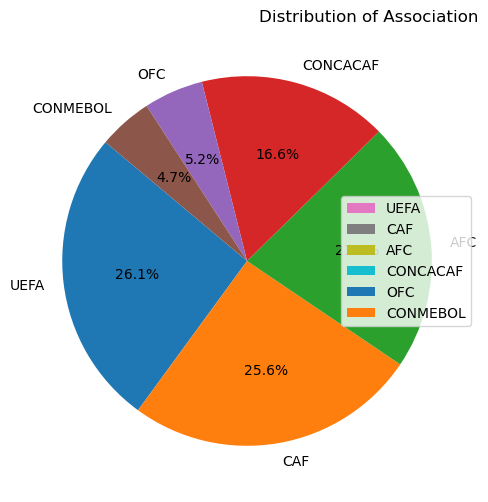

In [26]:
# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Association', loc='right')
#wedges, texts, autotexts = plt.pie(category_counts, autopct='%1.1f%%', startangle=140)
plt.legend(wedges, category_counts.index)
plt.show()

In [28]:
mean_pts = df['points'].mean()
mean_pts

1220.687345971564

In [42]:
df_pts_gr_mean = df[df['points']>mean_pts]
print(df_pts_gr_mean.head(5))
print("---")
df_pts_lr_mean = df[df['points']<mean_pts]
print(df_pts_lr_mean.head(5))

        team team_code association  rank  previous_rank   points  \
0     Brazil       BRA    CONMEBOL     1              1  1841.30   
1    Belgium       BEL        UEFA     2              2  1816.71   
2  Argentina       ARG    CONMEBOL     3              3  1773.88   
3     France       FRA        UEFA     4              4  1759.78   
4    England       ENG        UEFA     5              5  1728.47   

   previous_points  
0          1837.56  
1          1821.92  
2          1770.65  
3          1764.85  
4          1737.46  
---
                  team team_code association  rank  previous_rank   points  \
97   Equatorial Guinea       EQG         CAF    98             98  1215.66   
98             Lebanon       LBN         AFC    99            100  1211.71   
99               Congo       CGO         CAF   100             99  1208.79   
100              Kenya       KEN         CAF   101            102  1202.26   
101         Madagascar       MAD         CAF   102            105  1200

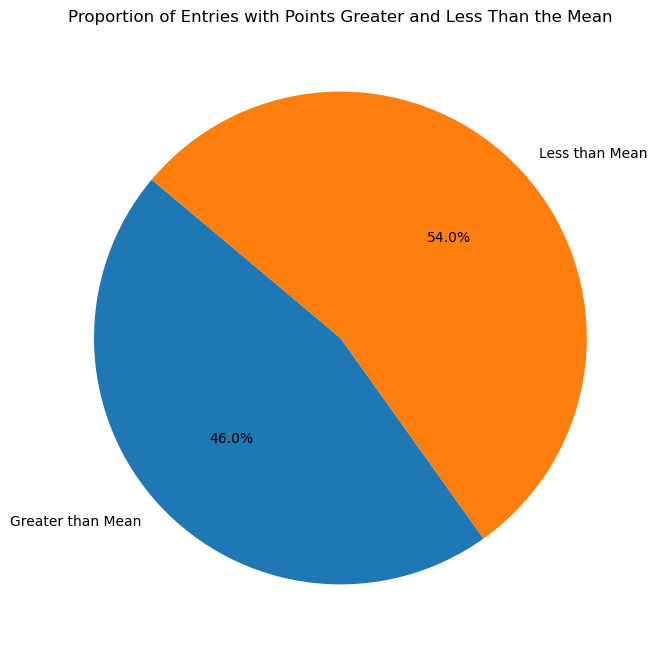

In [43]:
# Calculate the counts
counts = [len(df_pts_gr_mean), len(df_pts_lr_mean)]
labels = ['Greater than Mean', 'Less than Mean']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Entries with Points Greater and Less Than the Mean')
plt.show()

/Users/pranavsrinivasvenkatesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


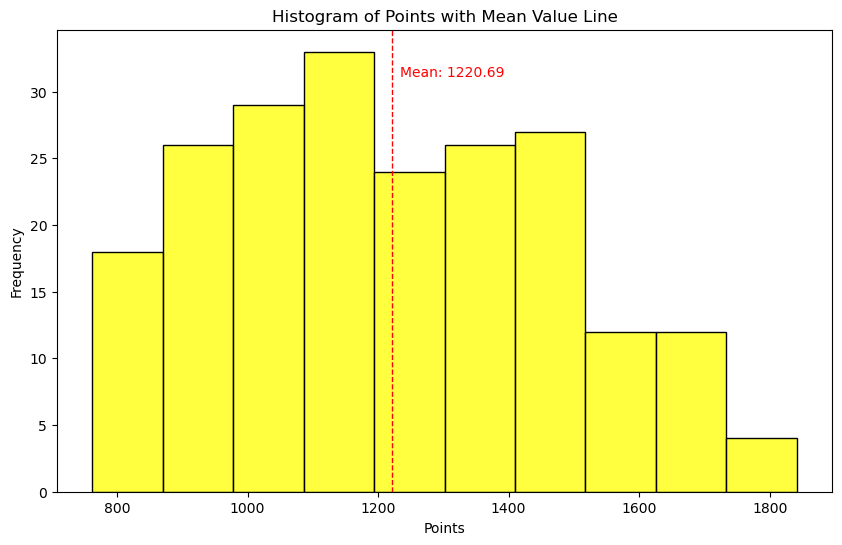

In [40]:
# Create the histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(df['points'], kde=False, color='yellow', bins=10)

# Plot the mean value line
plt.axvline(mean_pts, color='red', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(mean_pts * 1.01, max_ylim * 0.9, f'Mean: {mean_pts:.2f}', color='red')

plt.title('Histogram of Points with Mean Value Line')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

In [58]:
# Classify teams
df['status'] = 'Consistent'
df.loc[df['rank'] < df['previous_rank'], 'status'] = 'Improved'
df.loc[df['rank'] > df['previous_rank'], 'status'] = 'Dropped'

df.head(20)

,team,team_code,association,rank,previous_rank,points,previous_points,status
0,Brazil,BRA,CONMEBOL,1,1,1841.30,1837.56,Consistent
1,Belgium,BEL,UEFA,2,2,1816.71,1821.92,Consistent
2,Argentina,ARG,CONMEBOL,3,3,1773.88,1770.65,Consistent
3,France,FRA,UEFA,4,4,1759.78,1764.85,Consistent
4,England,ENG,UEFA,5,5,1728.47,1737.46,Consistent
5,Italy,ITA,UEFA,6,7,1726.14,1713.86,Improved
6,Spain,ESP,UEFA,7,6,1715.22,1716.93,Dropped
7,Netherlands,NED,UEFA,8,8,1694.51,1679.41,Consistent
8,Portugal,POR,UEFA,9,9,1676.56,1678.65,Consistent
9,Denmark,DEN,UEFA,10,10,1666.57,1665.47,Consistent


status
Improved      77
Dropped       68
Consistent    66
Name: count, dtype: int64


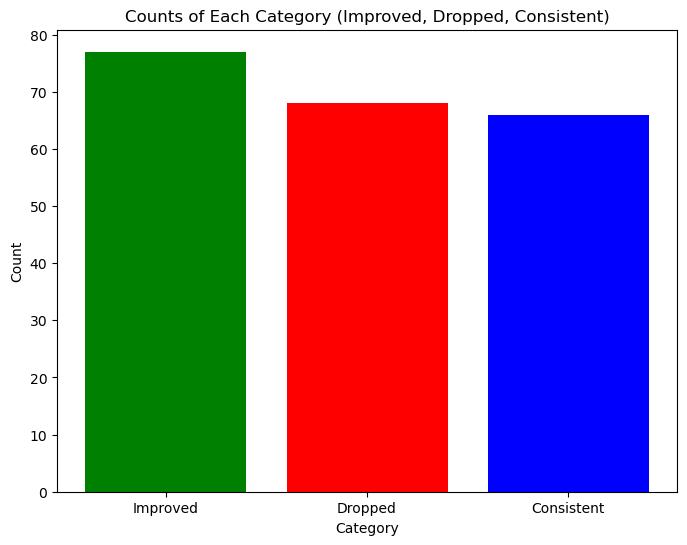

In [61]:
# Count each category
counts = df['status'].value_counts()
print(counts)
# Plot the bar plot
plt.figure(figsize=(8, 6))
plt.bar(counts.index, counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts of Each Category (Improved, Dropped, Consistent)')
plt.show()

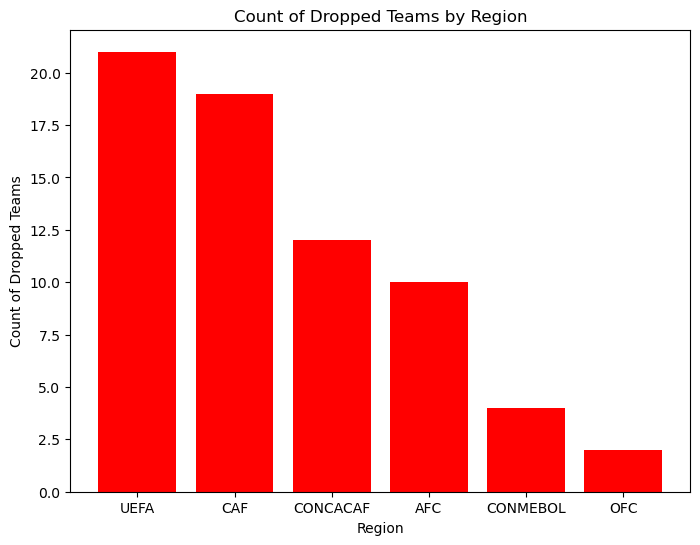

In [67]:
# Filter for dropped teams
df_dropped = df[df['status'] == 'Dropped']

# Count dropped teams by region
region_counts = df_dropped['association'].value_counts()

# Plot the bar plot
plt.figure(figsize=(8, 6))
plt.bar(region_counts.index, region_counts.values, color='red')
plt.xlabel('Region')
plt.ylabel('Count of Dropped Teams')
plt.title('Count of Dropped Teams by Region')
plt.show()

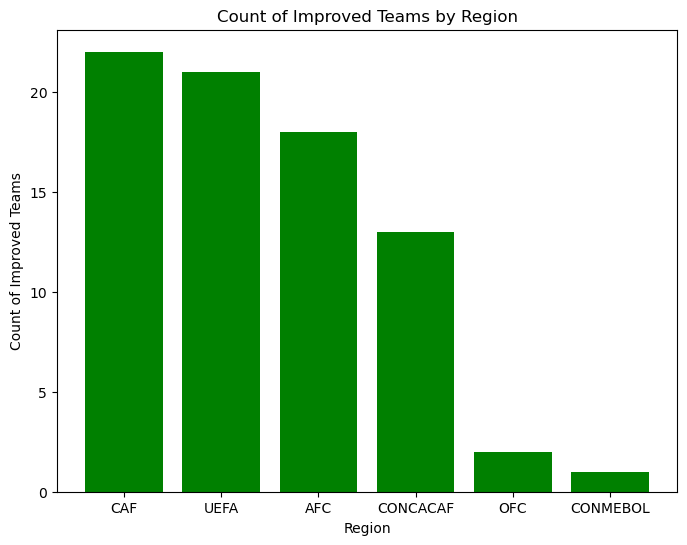

In [69]:
# Filter for dropped teams
df_improved = df[df['status'] == 'Improved']

# Count dropped teams by region
region_counts = df_improved['association'].value_counts()

# Plot the bar plot
plt.figure(figsize=(8, 6))
plt.bar(region_counts.index, region_counts.values, color='green')
plt.xlabel('Region')
plt.ylabel('Count of Improved Teams')
plt.title('Count of Improved Teams by Region')
plt.show()

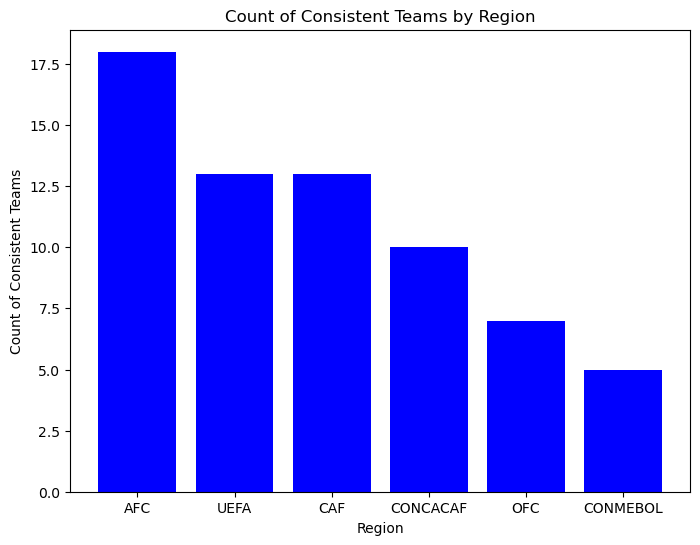

In [70]:
# Filter for dropped teams
df_consistent = df[df['status'] == 'Consistent']

# Count dropped teams by region
region_counts = df_consistent['association'].value_counts()

# Plot the bar plot
plt.figure(figsize=(8, 6))
plt.bar(region_counts.index, region_counts.values, color='blue')
plt.xlabel('Region')
plt.ylabel('Count of Consistent Teams')
plt.title('Count of Consistent Teams by Region')
plt.show()

/Users/pranavsrinivasvenkatesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pranavsrinivasvenkatesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/pranavsrinivasvenkatesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/pranavsrinivasvenkat

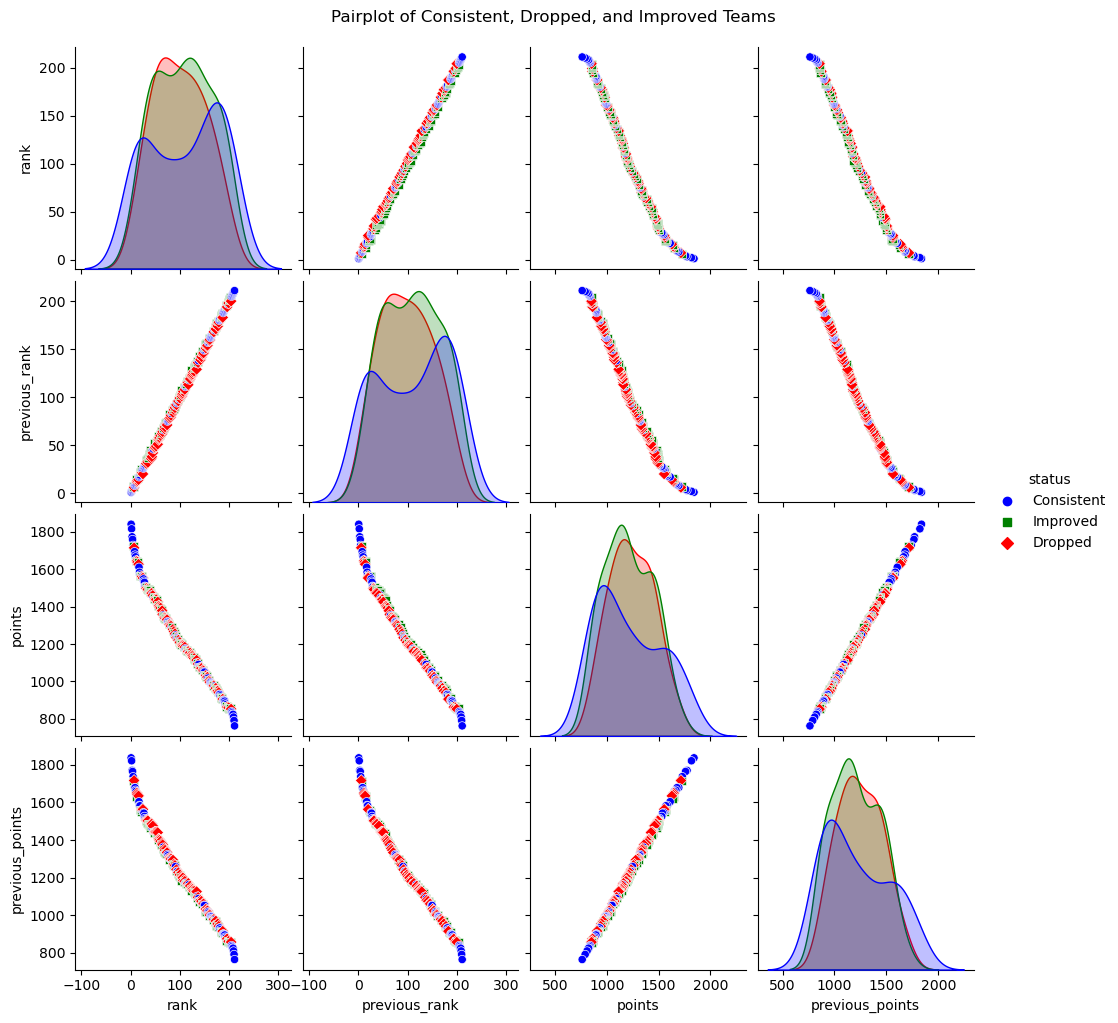

In [71]:
# Plot the pairplot
sns.pairplot(df, hue='status', palette={'Improved': 'green', 'Dropped': 'red', 'Consistent': 'blue'}, markers=['o', 's', 'D'])
plt.suptitle('Pairplot of Consistent, Dropped, and Improved Teams', y=1.02)
plt.show()